In [4]:
pip install tensorflow keras lime matplotlib


Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
data_dir = 'archive/bone_marrow_cell_dataset'

batch_size = 32
img_height = 299
img_width = 299

train_data_gen = datagen.flow_from_directory(directory=data_dir,
                                             target_size=(img_height, img_width),
                                             batch_size=batch_size,
                                             class_mode='categorical')


Found 25314 images belonging to 21 classes.


In [8]:
model = InceptionV3(weights='imagenet')


96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [9]:
class_labels = [
    "Abnormal eosinophil", "Artefact", "Basophil", "Blast", "Erythroblast", 
    "Eosinophil", "Faggott cell", "Hairy cell", "Smudge cell", "Immature lymphocyte", 
    "Lymphocyte", "Metamyelocyte", "Monocyte", "Myelocyte", "Band neutrophil", 
    "Segmented neutrophil", "Not identifiable", "Other cell", "Proerythroblast", 
    "Plasma cell", "Promyelocyte"
]


In [25]:
# Get a batch of images and labels
images, labels = next(train_data_gen)
# Select two images for visualization
img1 = images[15]



In [26]:
def predict(images):
    processed_images = preprocess_input(images)
    preds = model.predict(processed_images)
    return preds


In [27]:
explainer = lime_image.LimeImageExplainer()


In [39]:
explanation1 = explainer.explain_instance(img1.astype('double'), predict, top_labels=5, hide_color=1, num_samples=1000)



  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 983ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 952ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━

In [40]:
# For the first image
temp, mask = explanation1.get_image_and_mask(explanation1.top_labels[0], positive_only=True, num_features=5, hide_rest=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


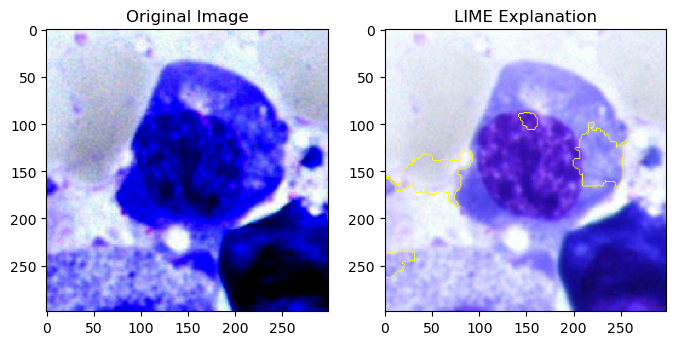

In [41]:
from matplotlib import pyplot as plt

# Create matplotlib figure
plt.figure(figsize=(8, 6))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Original Image')

# Plot explanation
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.title('LIME Explanation')

plt.show()
